In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score

In [2]:
df1 = pd.read_csv('C:\\Users\RadmehrFarzad\\OneDrive - Steampunk\\Desktop\\pg_da_ds_homework\\iaps.csv')
df2 = pd.read_csv('C:\\Users\RadmehrFarzad\\OneDrive - Steampunk\\Desktop\\pg_da_ds_homework\\sessions.csv')
df3 = pd.read_csv('C:\\Users\RadmehrFarzad\\OneDrive - Steampunk\\Desktop\\pg_da_ds_homework\\spendevents.csv')
df4 = pd.read_csv('C:\\Users\RadmehrFarzad\\OneDrive - Steampunk\\Desktop\\pg_da_ds_homework\\users.csv')

In [3]:
df12 = pd.merge(df1,df2,on='user_id')
df123 = pd.merge(df12,df3, on='user_id' )
df = pd.merge(df123,df4,on='user_id')

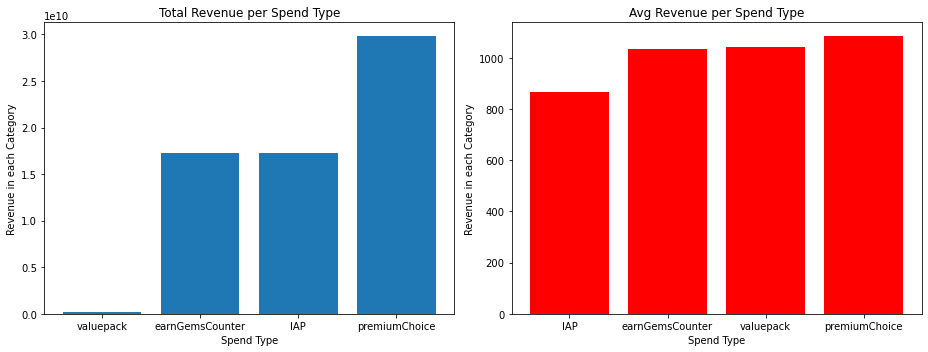

In [4]:
plt.subplots(figsize=(13,5))
plt.subplot(1,2,1)
age_purchases = df.groupby('spendtype')['rev'].sum().sort_values()
plt.bar(age_purchases.index,age_purchases, data=df)
plt.xlabel('Spend Type')
plt.ylabel('Revenue in each Category')
plt.title('Total Revenue per Spend Type')
plt.subplot(1,2,2)
age_avg_purchases = df.groupby('spendtype')['rev'].mean().sort_values()
plt.bar(age_avg_purchases.index,age_avg_purchases, data=df,color='red')
plt.xlabel('Spend Type')
plt.ylabel('Revenue in each Category')
plt.title('Avg Revenue per Spend Type')
plt.tight_layout()
plt.show()

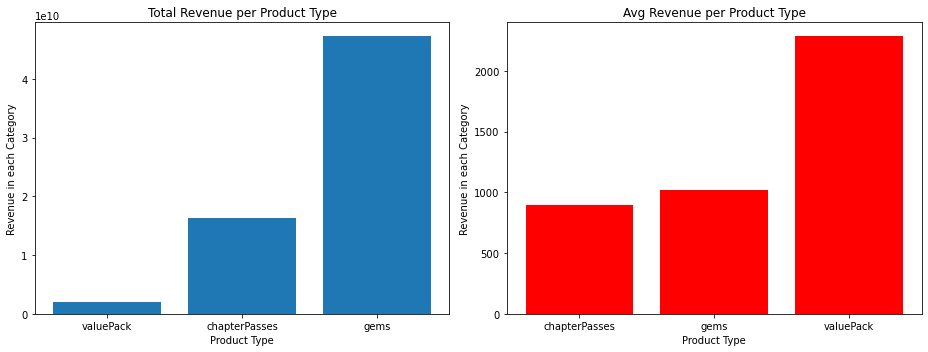

In [5]:
plt.subplots(figsize=(13,5))
plt.subplot(1,2,1)
age_purchases = df.groupby('prod_type')['rev'].sum().sort_values()
plt.bar(age_purchases.index,age_purchases, data=df)
plt.xlabel('Product Type')
plt.ylabel('Revenue in each Category')
plt.title('Total Revenue per Product Type')
plt.subplot(1,2,2)
age_avg_purchases = df.groupby('prod_type')['rev'].mean().sort_values()
plt.bar(age_avg_purchases.index,age_avg_purchases, data=df,color='red')
plt.xlabel('Product Type')
plt.ylabel('Revenue in each Category')
plt.title('Avg Revenue per Product Type')
plt.tight_layout()
plt.show()

#### iaps

In [6]:
df1.head()

,user_id,ts,date,prod_name,prod_type,rev
0,7480,2019-03-04 08:15:49,2019-03-04,iap_1_gems_2,gems,760
1,7480,2019-03-04 08:24:15,2019-03-04,iap_1_passes_2,chapterPasses,760
2,7480,2019-03-04 22:49:08,2019-03-04,iap_1_gems_1,gems,410
3,2466,2019-03-06 00:16:48,2019-03-06,iap_1_gems_2,gems,760
4,22001,2019-03-06 09:13:45,2019-03-06,iap_1_gems_2,gems,760


In [7]:
df1.shape

(6685, 6)

In [8]:
#checking spenttypes with negative amount
df3[df3['amount'] < 0].groupby('spendtype').sum()

,user_id,chapter,amount
spendtype,,,
IAP,56116120,41509,-611197
earnGemsCounter,548201459,166896,-45843758
valuepack,332762,482,-8463


In [9]:
df3[df3['amount'] > 0].groupby('spendtype').sum()

,user_id,chapter,amount
spendtype,,,
premiumChoice,161734798,112734,500861


In [10]:
#data types
df1.dtypes

user_id       int64
ts           object
date         object
prod_name    object
prod_type    object
rev           int64
dtype: object

In [11]:
#data information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6685 entries, 0 to 6684
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    6685 non-null   int64 
 1   ts         6685 non-null   object
 2   date       6685 non-null   object
 3   prod_name  6685 non-null   object
 4   prod_type  6685 non-null   object
 5   rev        6685 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 313.5+ KB


In [12]:
#Product types
df1['prod_type'].value_counts()

gems             4573
chapterPasses    2029
valuePack          83
Name: prod_type, dtype: int64

In [13]:
#list of Product names with counts
df1['prod_name'].value_counts()

iap_1_gems_2          2599
iap_1_passes_2        1064
iap_1_gems_5           976
iap_1_gems_1           693
iap_1_passes_1         576
iap_1_gems_10          231
iap_1_passes_5         226
iap_1_passes_10        163
iap_1_gems_20           69
iap_value_pack_004      46
iap_value_pack_008      13
iap_value_pack_001      12
iap_value_pack_005       5
iap_value_pack_010       3
iap_1_gems_50            3
iap_value_pack_003       2
iap_1_gems_100           2
iap_value_pack_007       1
iap_value_pack_009       1
Name: prod_name, dtype: int64

In [14]:
#highest revenue
df1['rev'].max()

35060

In [15]:
#lowest revenue
df1['rev'].min()

410

In [16]:
#checking missing values
df1.isnull().sum()

user_id      0
ts           0
date         0
prod_name    0
prod_type    0
rev          0
dtype: int64

In [17]:
#summary
df1.describe()

,user_id,rev
count,6685.000000,6685.000000
mean,11374.928347,1141.134630
std,6509.850178,1201.682124
min,2.000000,410.000000
25%,6338.000000,760.000000
50%,11351.000000,760.000000
75%,16510.000000,1810.000000
max,22569.000000,35060.000000


#### Sessions

In [18]:
df2.head()

,user_id,ts,date,session_num,last_session_termination_type
0,14067,2019-03-01 00:06:50,2019-03-01,1,NaN
1,14067,2019-03-01 00:22:27,2019-03-01,2,NaN
2,16275,2019-03-01 01:23:03,2019-03-01,1,NaN
3,16275,2019-03-01 01:31:16,2019-03-01,2,NaN
4,16275,2019-03-01 01:47:22,2019-03-01,3,NaN


In [19]:
#shape
df2.shape

(722955, 5)

In [20]:
#data types
df2.dtypes

user_id                            int64
ts                                object
date                              object
session_num                        int64
last_session_termination_type    float64
dtype: object

In [21]:
#data infomration
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722955 entries, 0 to 722954
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   user_id                        722955 non-null  int64  
 1   ts                             722955 non-null  object 
 2   date                           722955 non-null  object 
 3   session_num                    722955 non-null  int64  
 4   last_session_termination_type  0 non-null       float64
dtypes: float64(1), int64(2), object(2)
memory usage: 27.6+ MB


In [22]:
#checking for missing values
df2.isnull().sum()

user_id                               0
ts                                    0
date                                  0
session_num                           0
last_session_termination_type    722955
dtype: int64

In [23]:
#dropping column which has entirely missing values
df2 = df2.drop('last_session_termination_type', axis = 1)

#### Spendevents

In [24]:
df3.head()

,user_id,ts,date,story,chapter,spendtype,currency,amount
0,9829,2019-03-01 03:03:04,2019-03-01,story_1,0,earnGemsCounter,gems,-22
1,13757,2019-03-01 03:35:53,2019-03-01,story_1,0,earnGemsCounter,gems,-22
2,13757,2019-03-01 03:52:10,2019-03-01,story_2,0,earnGemsCounter,gems,-22
3,10009,2019-03-01 04:10:00,2019-03-01,story_1,0,earnGemsCounter,gems,-22
4,10009,2019-03-01 04:26:46,2019-03-01,story_2,0,earnGemsCounter,gems,-22


In [25]:
df3.shape

(107764, 8)

In [26]:
#data information
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107764 entries, 0 to 107763
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    107764 non-null  int64 
 1   ts         107764 non-null  object
 2   date       107764 non-null  object
 3   story      107764 non-null  object
 4   chapter    107764 non-null  int64 
 5   spendtype  106420 non-null  object
 6   currency   107764 non-null  object
 7   amount     107764 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 6.6+ MB


In [27]:
#checking data types
df3.dtypes

user_id       int64
ts           object
date         object
story        object
chapter       int64
spendtype    object
currency     object
amount        int64
dtype: object

In [28]:
#user id = 2062
df3[df3['user_id'] == 2062].sort_values(by = 'ts', ascending = False)

,user_id,ts,date,story,chapter,spendtype,currency,amount
15726,2062,2019-03-03 04:24:58,2019-03-03,story_1,8,premiumChoice,gems,27
15725,2062,2019-03-03 04:07:37,2019-03-03,story_1,6,premiumChoice,gems,55
15724,2062,2019-03-03 04:07:34,2019-03-03,story_1,6,IAP,gems,-73
15723,2062,2019-03-03 03:51:00,2019-03-03,story_1,5,premiumChoice,gems,64
15722,2062,2019-03-03 03:50:58,2019-03-03,story_1,5,IAP,gems,-73
15721,2062,2019-03-03 03:50:45,2019-03-03,story_1,5,IAP,gems,-73
15694,2062,2019-03-02 20:01:22,2019-03-03,story_1,0,earnGemsCounter,gems,-22


In [29]:
df3[df3['spendtype'] == 'premiumChoice']['user_id'].nunique()

4148

In [30]:
df3[df3['spendtype'] == 'earnGemsCounter']['user_id'].nunique()

17996

In [31]:
#number of users
df3[df3['spendtype'] == 'IAP']['user_id'].nunique()

1181

In [32]:
#spend types counts
df3['spendtype'].value_counts()

earnGemsCounter    87235
premiumChoice      14231
IAP                 4915
valuepack             39
Name: spendtype, dtype: int64

In [33]:
df3.isnull().sum()

user_id         0
ts              0
date            0
story           0
chapter         0
spendtype    1344
currency        0
amount          0
dtype: int64

In [34]:
#dropping rows with null values
df3.dropna(axis=0, inplace = True)

#### Users

In [35]:
df4.head()

,user_id,install_date,lang,country,hw_ver,os_ver
0,0,2019-03-01,en,US,"iPhone4,1",9.1
1,1,2019-03-01,en,IN,"iPod5,1",8.1.2
2,2,2019-03-06,en,US,"iPod7,1",8.4.1
3,3,2019-03-03,nb,NO,"iPhone8,1",9.2.1
4,4,2019-03-03,en,GB,"iPhone5,4",9.2.1


In [36]:
df4.shape

(22576, 6)

In [37]:
#data information
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22576 entries, 0 to 22575
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       22576 non-null  int64 
 1   install_date  22576 non-null  object
 2   lang          22576 non-null  object
 3   country       22564 non-null  object
 4   hw_ver        22576 non-null  object
 5   os_ver        22576 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.0+ MB


In [38]:
#checking data types
df4.dtypes

user_id          int64
install_date    object
lang            object
country         object
hw_ver          object
os_ver          object
dtype: object

In [39]:
#Top 10 countries of users
df4.country.value_counts().sort_values(ascending = False).head(10)

US    11710
GB     2419
CA      982
AU      867
PH      414
ID      332
NL      275
RU      251
TR      247
NO      241
Name: country, dtype: int64

In [40]:
#Top 10 languages of users
df4.lang.value_counts().sort_values(ascending = False).head(10)

en    18194
es      622
fr      386
de      346
nl      320
ru      257
pt      236
nb      224
tr      215
ar      194
Name: lang, dtype: int64

In [41]:
#Top 10 iphone models used by users
df4['hw_ver'].value_counts().sort_values(ascending = False).head(10)

iPhone7,2    3817
iPhone8,1    2854
iPhone6,1    2207
iPhone6,2    1483
iPhone5,2    1101
iPhone5,3    1010
iPad2,5      1004
iPhone7,1     986
iPhone8,2     904
iPhone4,1     844
Name: hw_ver, dtype: int64

In [42]:
#Top 10 iOS versions used by users
df4['os_ver'].value_counts().sort_values(ascending = False).head(10)

9.2.1    15038
9.2       2322
9.1       1612
7.1.2      770
8.3        485
8.4.1      398
8.4        383
9.0.2      283
8.1.2      160
9.3        136
Name: os_ver, dtype: int64

#### Machine Learning Models

In [43]:
#Labelling Target variables
df3['spendtype'].replace({'earnGemsCounter': 0, 'IAP': 0, 'valuepack': 0, 'premiumChoice': 1}, inplace = True)

In [44]:
#converting 'data' column to datetime
df3['date'] = pd.to_datetime(df3['date'])

In [45]:
df3['year'] = df3['date'].dt.year
df3['month'] = df3['date'].dt.month
df3['day'] = df3['date'].dt.day

In [46]:
#Dropping 'date' column
df3.drop('date', axis = 1, inplace = True)
df3.head()

,user_id,ts,story,chapter,spendtype,currency,amount,year,month,day
0,9829,2019-03-01 03:03:04,story_1,0,0,gems,-22,2019,3,1
1,13757,2019-03-01 03:35:53,story_1,0,0,gems,-22,2019,3,1
2,13757,2019-03-01 03:52:10,story_2,0,0,gems,-22,2019,3,1
3,10009,2019-03-01 04:10:00,story_1,0,0,gems,-22,2019,3,1
4,10009,2019-03-01 04:26:46,story_2,0,0,gems,-22,2019,3,1


In [47]:
#converting 'ts' column to datetime column
df3['ts'] = pd.to_datetime(df3['ts'])

In [48]:
#separating time components
df3['hour'] = df3['ts'].dt.hour
df3['minute'] = df3['ts'].dt.minute
df3['second'] = df3['ts'].dt.second

In [49]:
#dropping 'ts' column
df3.drop('ts', axis = 1, inplace = True)
df3.head()

,user_id,story,chapter,spendtype,currency,amount,year,month,day,hour,minute,second
0,9829,story_1,0,0,gems,-22,2019,3,1,3,3,4
1,13757,story_1,0,0,gems,-22,2019,3,1,3,35,53
2,13757,story_2,0,0,gems,-22,2019,3,1,3,52,10
3,10009,story_1,0,0,gems,-22,2019,3,1,4,10,0
4,10009,story_2,0,0,gems,-22,2019,3,1,4,26,46


In [50]:
#checking currency types
df3.currency.value_counts()

gems    106420
Name: currency, dtype: int64

In [51]:
#dropping 'currency' column
df3.drop('currency', axis = 1, inplace = True)

In [52]:
df3.head(7)

,user_id,story,chapter,spendtype,amount,year,month,day,hour,minute,second
0,9829,story_1,0,0,-22,2019,3,1,3,3,4
1,13757,story_1,0,0,-22,2019,3,1,3,35,53
2,13757,story_2,0,0,-22,2019,3,1,3,52,10
3,10009,story_1,0,0,-22,2019,3,1,4,10,0
4,10009,story_2,0,0,-22,2019,3,1,4,26,46
5,14151,story_1,0,0,-22,2019,3,1,6,38,33
6,10799,story_1,0,0,-22,2019,3,2,8,8,26


In [53]:
#checking data types
df3.dtypes

user_id       int64
story        object
chapter       int64
spendtype     int64
amount        int64
year          int64
month         int64
day           int64
hour          int64
minute        int64
second        int64
dtype: object

In [54]:
# Instantiating LabelEncoder
le = LabelEncoder()
df3['story'] = le.fit_transform(df3['story'])

In [55]:
# Splitting Predictor Variables and Target Variable
X = df3.drop(['spendtype'], axis = 1)
y = df3['spendtype']

In [56]:
#train-test splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [57]:
#checking Train and Test data length
print("Training Data Length: {}".format(len(X_train)))
print("Testing Data Length: {}".format(len(X_test)))

Training Data Length: 85136
Testing Data Length: 21284


In [58]:
#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Logistic Regression

In [59]:
#Logistic Regression Model Training
classifier_logreg = LogisticRegression(solver = 'liblinear', random_state = 0)
classifier_logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [60]:
#Model Predictions
y_pred = classifier_logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
#Evaluating Model Performance
print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy Score: 0.8715467017477918


In [62]:
#Confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[18166   315]
 [ 2419   384]]


In [63]:
#Evaluating results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

In [64]:
#setting dataframce for storing results
results = pd.DataFrame([['Logistic Regression', 
acc, prec, rec, f1, f2]], columns = ['Model', 
'Accuracy', 'Precision', 'Recall', 'F1 Score', 
'F2 Score'])

In [65]:
#sorting results
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.871547   0.549356  0.136996  0.219303  0.161196


In [66]:
#Cross Validation
scores = cross_val_score(classifier_logreg, X_train, y_train, cv = 5, scoring = 'accuracy')
print('Cross-validation scores: {}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores: [0.86645525 0.86785693 0.86961884 0.86838551 0.86879662]
Average cross-validation score: 0.8682226292917111


In [67]:
classifier_logreg.predict_proba(X_test)

array([[0.92451886, 0.07548114],
       [0.51907194, 0.48092806],
       [0.86152259, 0.13847741],
       ...,
       [0.95572805, 0.04427195],
       [0.9318477 , 0.0681523 ],
       [0.92528992, 0.07471008]])

#### KNN

In [68]:
# Fitting KNN to the Training set:
classifier = KNeighborsClassifier(
n_neighbors = 22, 
metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=22)

In [69]:
# Predicting the Test set results 
y_pred  = classifier.predict(X_test)

In [70]:
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

In [71]:
model_results = pd.DataFrame([['K-Nearest Neighbours', 
acc, prec, rec, f1, f2]], columns = ['Model', 
'Accuracy', 'Precision', 'Recall', 'F1 Score', 
'F2 Score'])

In [72]:
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
1  K-Nearest Neighbours  0.906503   0.708141  0.493400  0.581581  0.525256
0   Logistic Regression  0.871547   0.549356  0.136996  0.219303  0.161196


In [73]:
classifier.predict_proba(X_test)

array([[0.72727273, 0.27272727],
       [0.36363636, 0.63636364],
       [0.81818182, 0.18181818],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.86363636, 0.13636364]])

#### Naive Bayes

In [74]:
# Fitting Naive Byes to the Training set:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [75]:
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

In [76]:
model_results = pd.DataFrame([[
'Naive Bayes', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])

In [77]:
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  K-Nearest Neighbours  0.906503   0.708141  0.493400  0.581581  0.525256
2           Naive Bayes  0.906503   0.708141  0.493400  0.581581  0.525256
1   Logistic Regression  0.871547   0.549356  0.136996  0.219303  0.161196


In [78]:
classifier.predict_proba(X_test)

array([[2.98647574e-03, 9.97013524e-01],
       [4.15103569e-04, 9.99584896e-01],
       [5.40353713e-03, 9.94596463e-01],
       ...,
       [9.17728476e-02, 9.08227152e-01],
       [6.42585900e-01, 3.57414100e-01],
       [6.15624526e-01, 3.84375474e-01]])

#### Decision Tree

In [79]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [80]:
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

In [81]:
model_results = pd.DataFrame([[
'Decison Tree', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])

In [82]:
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  K-Nearest Neighbours  0.906503   0.708141  0.493400  0.581581  0.525256
1           Naive Bayes  0.906503   0.708141  0.493400  0.581581  0.525256
3          Decison Tree  0.906503   0.708141  0.493400  0.581581  0.525256
2   Logistic Regression  0.871547   0.549356  0.136996  0.219303  0.161196


#### Random Forest

In [83]:
classifier=RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [84]:
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

In [85]:
model_results = pd.DataFrame([[
'Random Forest', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])

In [86]:
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  K-Nearest Neighbours  0.906503   0.708141  0.493400  0.581581  0.525256
1           Naive Bayes  0.906503   0.708141  0.493400  0.581581  0.525256
2          Decison Tree  0.906503   0.708141  0.493400  0.581581  0.525256
4         Random Forest  0.906503   0.708141  0.493400  0.581581  0.525256
3   Logistic Regression  0.871547   0.549356  0.136996  0.219303  0.161196


In [87]:
results.reset_index(inplace = True)
results

,index,Model,Accuracy,Precision,Recall,F1 Score,F2 Score
0,0,K-Nearest Neighbours,0.906503,0.708141,0.493400,0.581581,0.525256
1,1,Naive Bayes,0.906503,0.708141,0.493400,0.581581,0.525256
2,2,Decison Tree,0.906503,0.708141,0.493400,0.581581,0.525256
3,4,Random Forest,0.906503,0.708141,0.493400,0.581581,0.525256
4,3,Logistic Regression,0.871547,0.549356,0.136996,0.219303,0.161196
